In [1]:
import pandas as pd
import numpy as np
  
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import os
import cv2

In [2]:
#extract the train data
import zipfile as zf
files = zf.ZipFile("Data/cd_train.zip", 'r')
files.extractall('Data/cd_train')
files.close()

In [3]:
#extract the test data
import zipfile as zf
files = zf.ZipFile("Data/cd_test.zip", 'r')
files.extractall('Data/cd_test')
files.close()

In [12]:
#reading all images along with labels
root_folder = 'Data/cd_train'
l1 = []
y = []
for folder in os.listdir(root_folder):
    for filename in os.listdir(f'{root_folder}/{folder}'):
        if 'gif' not in filename:
            img = cv2.imread(f'{root_folder}/{folder}/{filename}')
            img = cv2.resize(img, (250,250),interpolation=cv2.INTER_AREA)
            l1.append(img)
            if 'cat' in filename:
                y.append('cat')
            else:
                y.append('dog')

    
    

In [13]:
x_train = np.array(l1)

In [14]:
x_train.shape

(25000, 250, 250, 3)

In [15]:
y_train = y

In [17]:
y_train[:5]

['dog', 'cat', 'dog', 'cat', 'cat']

In [18]:
#convert the y into numpy array by label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train  = le.fit_transform(y_train)

In [19]:
y_train.shape

(25000,)

### Splitting the Data

In [20]:
#let us split the train data into test and train
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size = 0.25,random_state = 123)

In [21]:
x_train.shape

(18750, 250, 250, 3)

In [22]:
x_test.shape

(6250, 250, 250, 3)

### Defining the Model

In [23]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

2023-05-02 14:37:11.731528: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(250,250,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 119072)            0         
                                                                 
 dense (Dense)               (None, 500)               5

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', min_delta=0.005, patience=2, mode='auto')
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/5
469/469 [==============================] - 2691s 6s/step - loss: 0.6414 - accuracy: 0.5852 - val_loss: 0.7860 - val_accuracy: 0.4949
Epoch 2/5
469/469 [==============================] - 2281s 5s/step - loss: 0.6237 - accuracy: 0.5919 - val_loss: 0.8731 - val_accuracy: 0.5048
Epoch 3/5
469/469 [==============================] - 2444s 5s/step - loss: 0.5956 - accuracy: 0.6137 - val_loss: 1.1728 - val_accuracy: 0.5176
Epoch 4/5
469/469 [==============================] - 2258s 5s/step - loss: 0.6711 - accuracy: 0.6057 - val_loss: 1.0592 - val_accuracy: 0.4957
Epoch 5/5
469/469 [==============================] - 2557s 5s/step - loss: 0.5613 - accuracy: 0.6265 - val_loss: 1.4020 - val_accuracy: 0.5304


In [32]:
#Evaluating the model
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

196/196 - 195s - loss: 1.3963 - accuracy: 0.5189 - 195s/epoch - 995ms/step


In [33]:
print('Test loss is ',test_loss)
print('Test Accuracy is ',test_acc)

Test loss is  1.3962587118148804
Test Accuracy is  0.5188800096511841


Text(0.5, 1.0, 'Train - Accuracy')

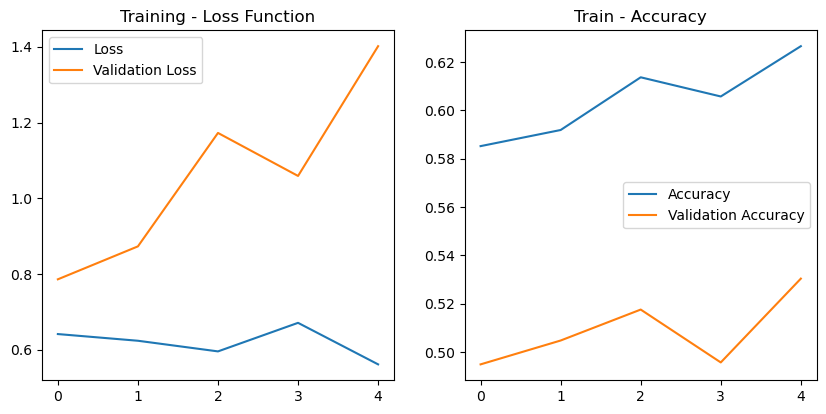

In [34]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')